<center><h1><b>Image Data Generator API On Potato Disease Classification Project</b></h1></center>

This API can be used on images instead of Augmentation method to augment images

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import os
import shutil
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import HTML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
import splitfolders  # helps to split a dataset into the train, validation, and test sets
from collections import Counter

%matplotlib inline

In [ ]:
# pip install split-folders

# Dataset Processing

### Extracting the needed datasets and splitting into train, test, and validation  directories

In [16]:
# Define the source directory and the specific subdirectories to copy
source_dir = Path("/kaggle/input/plant-village/PlantVillage")
target_subdirs = [
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy"
]

# Define the destination directory for the copied datasets
temp_training_dir = Path("/kaggle/working/training")

# Clear the existing 'training' directory if it exists, then recreate it
if temp_training_dir.exists() and temp_training_dir.is_dir():
    shutil.rmtree(temp_training_dir)
temp_training_dir.mkdir(parents=True, exist_ok=True)

# Copy the specified subdirectories to the 'training' directory
for subdir in target_subdirs:
    src_path = source_dir / subdir
    dst_path = temp_training_dir / subdir
    
    # Check if the source directory exists before copying
    if src_path.exists():
        try:
            shutil.copytree(src_path, dst_path)
            print(f"Copied {src_path} to {dst_path}")
        except Exception as e:
            print(f"Failed to copy {src_path}: {e}")
    else:
        print(f"Directory {src_path} not found!")

# Define the final output folder for train, test, and validation splits
final_output_dir = Path("/kaggle/working/train_test_val")

# Clear the existing 'train_test_val' directory if it exists, then recreate it
if final_output_dir.exists() and final_output_dir.is_dir():
    shutil.rmtree(final_output_dir)
final_output_dir.mkdir(parents=True, exist_ok=True)

# Perform dataset split with a flat directory structure
splitfolders.ratio(
    input=temp_training_dir, 
    output=final_output_dir, 
    seed=42, 
    ratio=(0.7, 0.2, 0.1),  # Train: 70%, Validation: 20%, Test: 10%
    group_prefix=None, 
    move=False  # Use False to copy files; set to True to move files
)

# Define subdirectories for train, val, and test
train_dir = final_output_dir / "train"
val_dir = final_output_dir / "val"
test_dir = final_output_dir / "test"

print(f"Dataset split completed. Train, test, and validation datasets saved to {final_output_dir}")

Copied /kaggle/input/plant-village/PlantVillage/Potato___Early_blight to /kaggle/working/training/Potato___Early_blight
Copied /kaggle/input/plant-village/PlantVillage/Potato___Late_blight to /kaggle/working/training/Potato___Late_blight
Copied /kaggle/input/plant-village/PlantVillage/Potato___healthy to /kaggle/working/training/Potato___healthy


Copying files: 2152 files [00:00, 7412.21 files/s]

Dataset split completed. Train, test, and validation datasets saved to /kaggle/working/train_test_val


In [11]:
"""# Define the source directory and the specific subdirectories to copy
source_dir = Path("/kaggle/input/plant-village/PlantVillage")
target_subdirs = [
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy"
]

# Define the destination directory for the copied datasets
temp_training_dir = Path("/kaggle/working/training")

# Clear the existing 'training' directory if it exists, then recreate it
if temp_training_dir.exists() and temp_training_dir.is_dir():
    shutil.rmtree(temp_training_dir)
temp_training_dir.mkdir(parents=True, exist_ok=True)

# Copy the specified subdirectories to the 'training' directory
for subdir in target_subdirs:
    src_path = source_dir / subdir
    dst_path = temp_training_dir / subdir
    
    # Check if the source directory exists before copying
    if src_path.exists():
        try:
            shutil.copytree(src_path, dst_path)
            print(f"Copied {src_path} to {dst_path}")
        except Exception as e:
            print(f"Failed to copy {src_path}: {e}")
    else:
        print(f"Directory {src_path} not found!")

# Define the final output folder for train, test, and validation splits
final_output_dir = Path("/kaggle/working/train_test_val")

# Clear the existing 'train_test_val' directory if it exists, then recreate it
if final_output_dir.exists() and final_output_dir.is_dir():
    shutil.rmtree(final_output_dir)
final_output_dir.mkdir(parents=True, exist_ok=True)

# Perform dataset split with the existing subdirectories
splitfolders.ratio(
    input=temp_training_dir, 
    output=final_output_dir, 
    seed=42, 
    ratio=(0.7, 0.2, 0.1),  # Train: 70%, Validation: 20%, Test: 10%
    group_prefix=None, 
    move=False  # Use False to copy files; set to True to move files
)

# Function to flatten directories (move all files to the parent directory)
def flatten_directory(directory):
    for subdir in directory.iterdir():
        if subdir.is_dir():
            for file in subdir.iterdir():
                if file.is_file():
                    shutil.move(str(file), str(directory))  # Move file to the parent directory
            shutil.rmtree(subdir)  # Remove the now-empty subdirectory

# Flatten the train, val, and test directories
train_dir = final_output_dir / "train"
val_dir = final_output_dir / "val"
test_dir = final_output_dir / "test"

flatten_directory(train_dir)
flatten_directory(val_dir)
flatten_directory(test_dir)

print(f"Dataset split completed. Train, test, and validation datasets saved to {final_output_dir}")
"""

Copied /kaggle/input/plant-village/PlantVillage/Potato___Early_blight to /kaggle/working/training/Potato___Early_blight
Copied /kaggle/input/plant-village/PlantVillage/Potato___Late_blight to /kaggle/working/training/Potato___Late_blight
Copied /kaggle/input/plant-village/PlantVillage/Potato___healthy to /kaggle/working/training/Potato___healthy


Copying files: 2152 files [00:00, 7343.91 files/s]


Dataset split completed. Train, test, and validation datasets saved to /kaggle/working/train_test_val


In [18]:
# Function to count the total number of files in a directory
def count_files(directory):
    return sum(1 for _ in directory.rglob("*") if _.is_file())

# Print the count of datasets in each directory
train_count = count_files(train_dir)
print(f"Train dataset count: {train_count}")

val_count = count_files(val_dir)
print(f"Validation dataset count: {val_count}")

test_count = count_files(test_dir)
print(f"Test dataset count: {test_count}")

Train dataset count: 1506
Validation dataset count: 430
Test dataset count: 216


In [19]:
# Clear the existing 'training' directory if it exists
if temp_training_dir.exists() and temp_training_dir.is_dir():
    shutil.rmtree(temp_training_dir)

In [53]:
# Constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

### Train Data processing

In [37]:
# Train data generator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/train_test_val/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True  # Enables shuffling of the training dataset
)

Found 1506 images belonging to 3 classes.


### Validation Data processing

In [38]:
# Validation data generator
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/working/train_test_val/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True  # Enables shuffling of the validation dataset
)

Found 430 images belonging to 3 classes.


### Test Dataset Processing

In [69]:
# Test data generator
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/working/train_test_val/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)

Found 216 images belonging to 3 classes.


In [40]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.7291272  0.7212841  0.7722645 ]
  [0.7294118  0.72156864 0.7725491 ]
  [0.7105736  0.7027305  0.75371087]
  ...
  [0.54901963 0.5372549  0.5803922 ]
  [0.54901963 0.5372549  0.5803922 ]
  [0.54901963 0.5372549  0.5803922 ]]

 [[0.7236975  0.71585435 0.76683474]
  [0.7294118  0.72156864 0.7725491 ]
  [0.7139672  0.70612407 0.75710446]
  ...
  [0.551489   0.5397243  0.58286154]
  [0.5521677  0.540403   0.58354026]
  [0.5528465  0.5410818  0.58421904]]

 [[0.71826774 0.7104246  0.761405  ]
  [0.7294118  0.72156864 0.7725491 ]
  [0.71736085 0.7095177  0.7604981 ]
  ...
  [0.5481208  0.5363561  0.57949334]
  [0.54676336 0.53499866 0.5781359 ]
  [0.5454059  0.5336412  0.5767785 ]]

 ...

 [[0.7174932  0.7135716  0.76847357]
  [0.71681446 0.7128929  0.76779485]
  [0.7161357  0.7122141  0.76711607]
  ...
  [0.55420625 0.5463631  0.5973435 ]
  [0.5796694  0.5718263  0.62280667]
  [0.56877923 0.5609361  0.6119165 ]]

 [[0.7134413  0.70951974 0.7644217 ]
  [0.7114051  0.70748353 0.7623855 ]


### Building CNN Model

In [50]:
# Define the distribution strategy to use all the available GPUs
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

Number of devices: 2


In [51]:
# Model definition within strategy scope
with strategy.scope():
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    n_classes = 3

    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Calculate steps per epoch and validation steps
train_steps_per_epoch = train_generator.samples // BATCH_SIZE
val_steps_per_epoch = val_generator.samples // BATCH_SIZE

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 481ms/step - accuracy: 0.7710 - loss: 0.5609 - val_accuracy: 0.9279 - val_loss: 0.1816
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0945 - val_accuracy: 1.0000 - val_loss: 0.1750
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 454ms/step - accuracy: 0.8729 - loss: 0.3162 - val_accuracy: 0.9231 - val_loss: 0.2420
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.2665 - val_accuracy: 1.0000 - val_loss: 0.0710
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 457ms/step - accuracy: 0.9118 - loss: 0.2205 - val_accuracy: 0.9327 - val_loss: 0.1741
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0666 - val_accuracy: 1.0000 - val_loss: 0.0804
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 457ms/step - accuracy: 0.9204 - loss: 0.2160 - val_accuracy: 0.9183 - val_loss: 0.2044
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.1875 - val_accuracy: 0.8571

In [55]:
# model evaluation
scores = model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9023 - loss: 0.2878


#### Checking the params and usefulness of history

In [56]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [57]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [58]:
# List of accuracies record during training 
history.history['accuracy']

[0.8900949954986572,
 1.0,
 0.9253731369972229,
 0.9375,
 0.9308005571365356,
 1.0,
 0.9267299771308899,
 0.9375,
 0.898236095905304,
 0.9375,
 0.9308005571365356,
 0.8125,
 0.9308005571365356,
 1.0,
 0.9647218585014343,
 0.9375,
 0.9348710775375366,
 0.9375,
 0.9362279772758484,
 1.0]

#### Plotting the history metrics

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

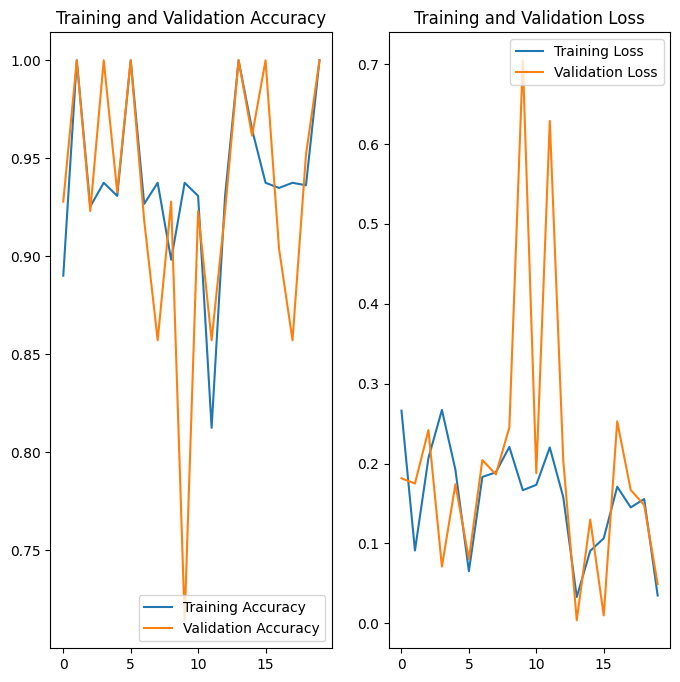

In [60]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Chart
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

### Predictions

first image to predict
actual label: Potato_Late_Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Label: Potato_Late_Blight


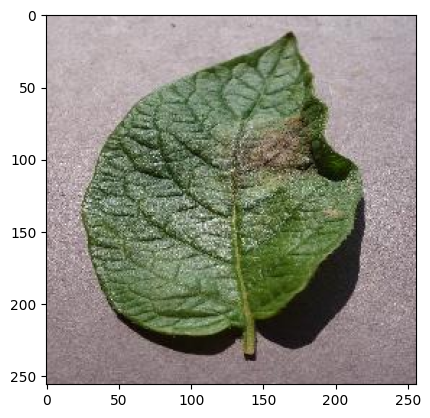

In [71]:
class_names = ['Potato_Early_Blight', 'Potato_Late_Blight', 'Potato_Healthy']

for images_batch, labels_batch in test_generator:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(f'Predicted Label: {class_names[np.argmax(batch_prediction[0])]}')

    break

In [74]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


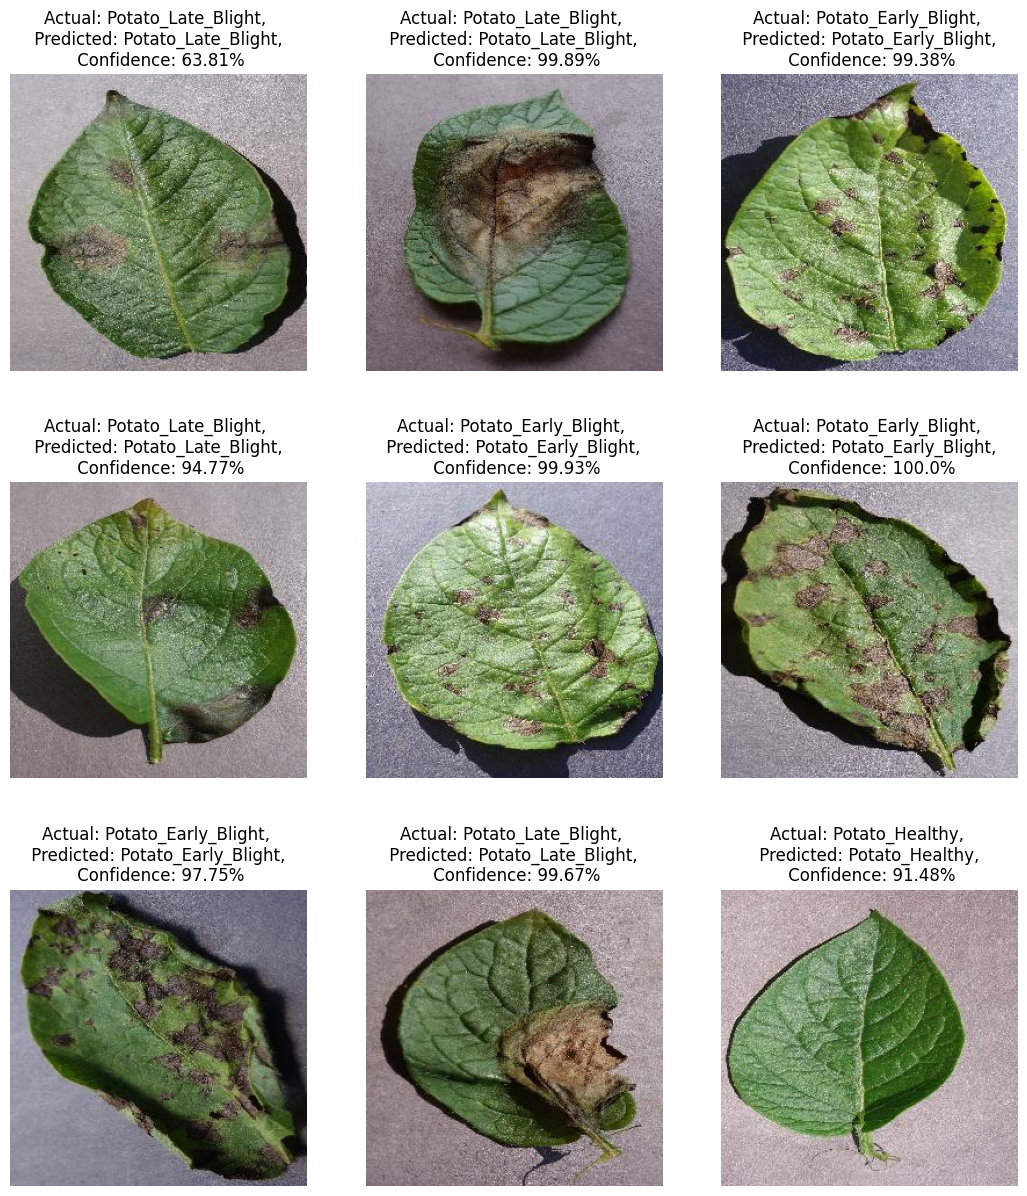

In [75]:
plt.figure(figsize=(13, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%')
        plt.axis('off')

    break

In [76]:
model_version= 'potato_h5_model.h5'
model.save(model_version)